In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#preprocessing
from sklearn.preprocessing import LabelEncoder
#classification
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics
from scipy.stats import uniform, randint, loguniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform, randint, loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
#!pip install scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

## Emotion

In [2]:
df = pd.read_csv('clean_ravdess_dm1.csv', skipinitialspace=True)
df.drop(['Unnamed: 0'], inplace=True, axis=1)
y = np.array(df["emotion"])
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,mfcc_mean,mfcc_std,mfcc_max,...,stft_kur,stft_skew,mean,std,min,kur,skew,intFill,zcs_log,length_ms_log
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,-33.485947,134.654860,171.69092,...,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,9.406061,0.273153,-36.793432,4.230321,3.572523
1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,-29.502108,130.485630,205.00770,...,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,19.564187,0.292157,-33.816810,4.143202,3.591510
2,speech,happy,strong,Dogs are sitting by the door,2nd,16.0,F,-30.532463,126.577110,165.45653,...,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,4.881241,0.302659,-32.290737,4.272375,3.669410
3,song,surprised,normal,Kids are talking by the door,1st,14.0,F,-36.059555,159.725160,190.03609,...,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,13.040259,-0.081014,-49.019839,4.065094,3.560743
4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,-31.405996,122.125824,161.13400,...,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,7.485109,0.414872,-31.214503,4.180040,3.643847


In [3]:
categorical_cols = ["vocal_channel","emotional_intensity","statement","repetition","sex"]

df = pd.get_dummies(df, columns=categorical_cols)#we get one colum for song and one column for speech
X = df.values

le = LabelEncoder()
df['emotion'] = le.fit_transform(df['emotion'])# se faccio metodo dummy avrei altre 8 colonne in più. cosi rimane una

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445
emotion,3.000000e+00,0.000000e+00,4.000000,7.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,6.000000,1.000000,1.000000,...,4.000000,0.000000,3.000000,4.000000,5.000000,6.000000,1.000000,5.000000,7.000000,7.000000
actor,2.000000e+00,1.600000e+01,16.000000,1.400000e+01,2.000000e+00,2.000000e+00,1.200000e+01,12.000000,6.000000,6.000000,...,13.000000,19.000000,19.000000,5.000000,19.000000,3.000000,7.000000,17.000000,19.000000,19.000000
mfcc_mean,-3.348595e+01,-2.950211e+01,-30.532463,-3.605956e+01,-3.140600e+01,-3.017717e+01,-3.389936e+01,-29.462296,-34.117620,-34.821735,...,-27.378132,-23.191303,-26.236550,-28.409400,-26.366121,-22.787794,-28.682810,-25.771196,-25.815453,-28.242815
mfcc_std,1.346549e+02,1.304856e+02,126.577110,1.597252e+02,1.221258e+02,1.395075e+02,1.591976e+02,116.833786,165.021670,164.230010,...,131.388350,103.810550,111.367516,136.806050,149.740360,113.349300,154.492430,157.241900,147.116780,159.943400
mfcc_max,1.716909e+02,2.050077e+02,165.456530,1.900361e+02,1.611340e+02,2.283271e+02,2.076322e+02,167.967530,189.059660,153.926040,...,201.068730,175.246340,184.788070,225.157750,236.998670,202.859280,197.396960,251.228530,214.569700,219.843500
sc_mean,5.792551e+03,5.197621e+03,4830.743037,5.376446e+03,5.146012e+03,5.718248e+03,6.349352e+03,5486.705835,5016.271911,5481.013422,...,5477.363362,6425.902510,5781.926973,3111.502285,5431.164043,3918.703428,4659.880471,5604.753887,4645.862618,5524.736973
sc_std,3.328055e+03,4.040932e+03,3332.131300,4.053663e+03,3.442724e+03,4.008804e+03,4.014630e+03,3602.202957,3239.938157,2941.101823,...,3995.231844,3506.448391,2857.521965,2922.569455,3068.148140,3149.520778,3663.074145,3300.232336,3055.279038,3596.031841
sc_min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,991.364402,0.000000,0.000000,...,1108.596105,1312.357425,1489.165574,0.000000,882.776720,979.297084,0.000000,818.317638,511.528673,760.822547
sc_max,1.354196e+04,1.200029e+04,12007.751173,1.204822e+04,1.202558e+04,1.284023e+04,1.208151e+04,11999.999998,12204.269010,12029.892125,...,12012.455816,12056.769834,11573.656845,12000.000302,11760.043064,11981.598019,12192.374121,10834.058255,10919.537644,11981.912464
sc_kur,-1.120769e+00,-1.531204e+00,-1.130153,-1.497765e+00,-1.167544e+00,-1.503746e+00,-1.609622e+00,-1.288444,-0.734307,-0.478187,...,-1.646461,-1.533138,-1.112142,0.813905,-1.414370,-0.083404,-0.959309,-1.540621,-1.178478,-1.465594


In [5]:
y = np.array(df["emotion"]) #target variable
df.drop('emotion', axis=1, inplace=True)
x=df.values


In [6]:
x.shape, y.shape

((2446, 33), (2446,))

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=0
)

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1712, 33), (1712,), (734, 33), (734,))

In [9]:
# with stratify you make every portion to be quite similar
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.15372036 0.1529027  0.0784955  0.15331153 0.15331153 0.07645135
 0.15372036 0.07808667]
[0.1536215  0.15303738 0.07827103 0.15303738 0.1536215  0.07651869
 0.1536215  0.07827103]
[0.15395095 0.15258856 0.07901907 0.15395095 0.15258856 0.07629428
 0.15395095 0.07765668]


### Knn

In [10]:
norm = StandardScaler() #standardizzare test e train separatamente, altrimenti cheat
norm.fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

In [12]:
%%time
param_grid = {
    "n_neighbors": np.arange(1, 200),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
} 

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
)
grid.fit(x_train_norm, y_train)
clf = grid.best_estimator_

Wall time: 1min 48s


In [13]:
print(grid.best_params_, grid.best_score_)

{'metric': 'cityblock', 'n_neighbors': 96, 'weights': 'distance'} 0.37038940889639066


In [14]:
clf.score(x_test_norm, y_test)

0.3637602179836512

In [15]:
grid.cv_results_ #risutlati per ogni combinazione di parametri (forse)
results = pd.DataFrame(grid.cv_results_) #in dataframe per miglior visualizzazione 
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000625,0.003062,0.023127,0.010479,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.233236,0.239067,...,0.198830,0.210526,0.189504,0.201166,0.213450,0.230994,0.207602,0.216881,0.019769,794
1,0.001250,0.004240,0.018051,0.008463,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.233236,0.239067,...,0.198830,0.210526,0.189504,0.201166,0.213450,0.230994,0.207602,0.216881,0.019769,794
2,0.001250,0.004239,0.026566,0.007161,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.271137,0.288630,...,0.257310,0.257310,0.256560,0.274052,0.274854,0.260234,0.280702,0.266413,0.019189,790
3,0.001875,0.005077,0.017816,0.006257,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.233236,0.239067,...,0.198830,0.210526,0.189504,0.201166,0.213450,0.230994,0.207602,0.216881,0.019769,794
4,0.002188,0.005422,0.027276,0.006857,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.282799,0.276968,...,0.266082,0.263158,0.244898,0.276968,0.283626,0.269006,0.271930,0.269043,0.018857,786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,0.000859,0.001749,0.038265,0.010547,cityblock,197,distance,"{'metric': 'cityblock', 'n_neighbors': 197, 'w...",0.311953,0.352770,...,0.350877,0.371345,0.329446,0.326531,0.371345,0.380117,0.403509,0.357597,0.023847,374
792,0.001323,0.002977,0.043961,0.010360,cityblock,198,uniform,"{'metric': 'cityblock', 'n_neighbors': 198, 'w...",0.335277,0.349854,...,0.339181,0.353801,0.311953,0.320700,0.356725,0.371345,0.385965,0.349474,0.020816,636
793,0.001780,0.004329,0.040399,0.010057,cityblock,198,distance,"{'metric': 'cityblock', 'n_neighbors': 198, 'w...",0.311953,0.358601,...,0.345029,0.374269,0.329446,0.332362,0.371345,0.371345,0.403509,0.357363,0.024580,383
794,0.000226,0.000428,0.041469,0.008487,cityblock,199,uniform,"{'metric': 'cityblock', 'n_neighbors': 199, 'w...",0.338192,0.335277,...,0.342105,0.359649,0.309038,0.317784,0.368421,0.362573,0.380117,0.348891,0.020866,647


In [16]:
results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]
results["metric_weight"]

0       euclidean , uniform
1      euclidean , distance
2       euclidean , uniform
3      euclidean , distance
4       euclidean , uniform
               ...         
791    cityblock , distance
792     cityblock , uniform
793    cityblock , distance
794     cityblock , uniform
795    cityblock , distance
Name: metric_weight, Length: 796, dtype: object

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

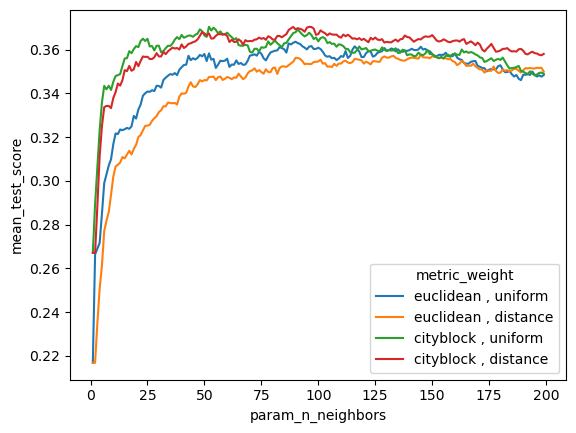

In [17]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
) #come si comportano le combinazioni di parametri, qui semplice perché poche combinazioni (nel progetto avremo più plot)

In [18]:
y_pred = clf.predict(x_test_norm)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58       113
           1       0.44      0.54      0.49       112
           2       0.48      0.28      0.35        58
           3       0.29      0.14      0.19       113
           4       0.25      0.37      0.29       112
           5       0.26      0.21      0.24        56
           6       0.31      0.24      0.27       113
           7       0.30      0.53      0.38        57

    accuracy                           0.36       734
   macro avg       0.37      0.36      0.35       734
weighted avg       0.37      0.36      0.35       734



In [20]:
clf.predict_proba(x_test_norm) #probabilità di essere 0, 1, 2...

array([[0.36571224, 0.04005386, 0.01868906, ..., 0.        , 0.07125324,
        0.        ],
       [0.09775238, 0.05952224, 0.13173537, ..., 0.05776983, 0.12210097,
        0.25992392],
       [0.11634402, 0.16833472, 0.00848984, ..., 0.15076784, 0.2409414 ,
        0.        ],
       ...,
       [0.11573935, 0.03671495, 0.11042933, ..., 0.00880374, 0.0955226 ,
        0.26940665],
       [0.11271428, 0.08046779, 0.17506656, ..., 0.14493748, 0.12949763,
        0.14423385],
       [0.03233075, 0.25088751, 0.0087466 , ..., 0.14521331, 0.29101087,
        0.        ]])

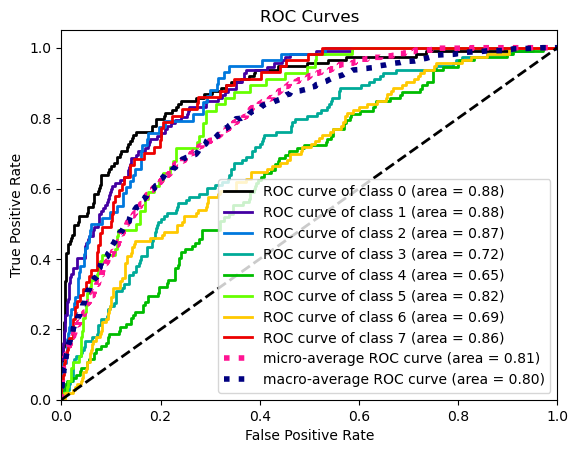

0.7963601818157288


In [21]:
plot_roc(y_test, clf.predict_proba(x_test_norm))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(x_test_norm), multi_class="ovr", average="macro"))

### Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB #se abbiamo tante categorical variables foese meglio CategoricalNB

In [23]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.58      0.63       113
           1       0.66      0.22      0.33       112
           2       0.28      0.34      0.31        58
           3       0.41      0.15      0.22       113
           4       0.25      0.24      0.25       112
           5       0.17      0.84      0.29        56
           6       0.42      0.10      0.16       113
           7       0.30      0.46      0.36        57

    accuracy                           0.32       734
   macro avg       0.40      0.37      0.32       734
weighted avg       0.43      0.32      0.32       734



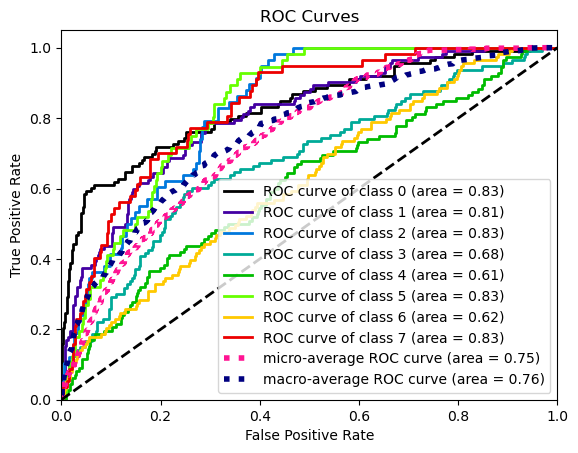

0.7556156327365897


In [24]:
plot_roc(y_test, clf.predict_proba(x_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(x_test), multi_class="ovr", average="macro"))

### Decision Tree

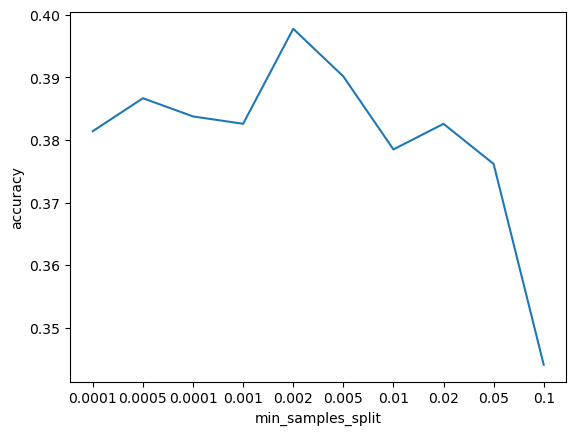

In [25]:
min_samples_splits = [0.0001, 0.0005 ,0.0001, 0.001 , 0.002, 0.005, 0.01, 0.02, 0.05, 0.1] #primo hyperparameter
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, x_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()


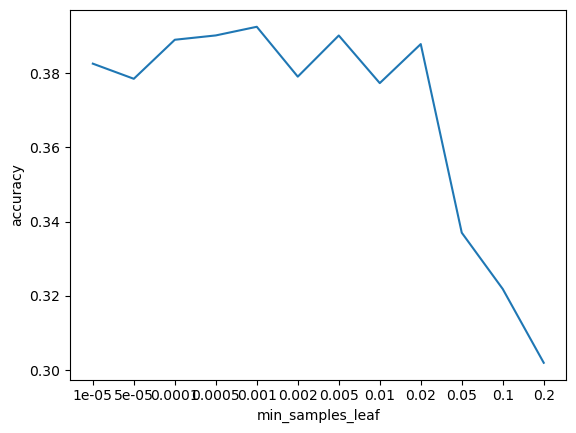

In [26]:
min_samples_leafs = [0.00001, 0.00005, 0.0001, 0.0005 ,0.001 , 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2] #altro
scores = list()
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores.append(cross_val_score(dt, x_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show() 

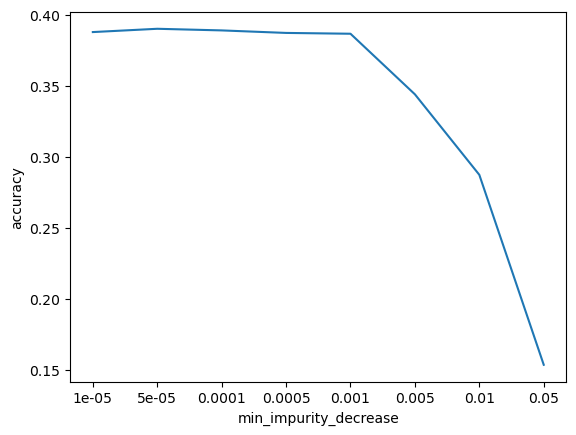

In [27]:
min_impurity_decreases= [0.00001, 0.00005,0.0001, 0.0005, 0.001, 0.005, 0.01,0.05]
scores = list()
for min_impurity_decrease in min_impurity_decreases:
    dt = DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
    scores.append(cross_val_score(dt, x_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_impurity_decreases)), min_impurity_decreases)
plt.xlabel("min_impurity_decrease")
plt.ylabel("accuracy")
plt.show()

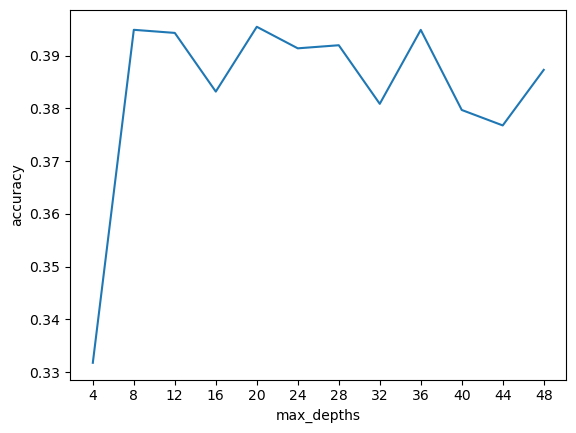

In [28]:
max_depths = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, x_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

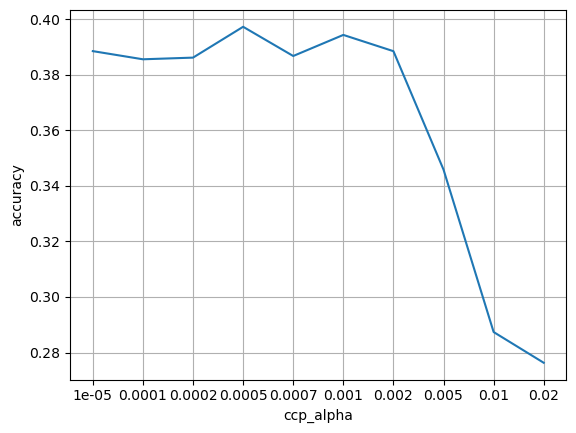

In [29]:
ccp_alphas = [0.00001, 0.0001, 0.0002, 0.0005, 0.0007, 0.001, 0.002, 0.005, 0.01, 0.02]
scores = list()
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    scores.append(cross_val_score(dt, x_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(ccp_alphas)), ccp_alphas)
plt.grid()
plt.xlabel("ccp_alpha")
plt.ylabel("accuracy")
plt.show()                

In [30]:
%%time
param_grid = {
    "min_samples_split":uniform(0.0005,0.005),
    "min_samples_leaf": uniform(0.00005, 0.005),
    "min_impurity_decrease":uniform(0.00005, 0.005),
    "max_depth": randint(5, 40),
    "criterion": ["gini", "entropy"],
    "ccp_alpha": uniform(0.0001, 0.002)
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5,random_state=0),
    n_jobs=-1,
    n_iter=500,
)
grid.fit(x_train, y_train)
clf = grid.best_estimator_

Wall time: 1min 41s


In [31]:
print(grid.best_params_, grid.best_score_)

{'ccp_alpha': 0.00185834550629465, 'criterion': 'gini', 'max_depth': 21, 'min_impurity_decrease': 0.002463397754255203, 'min_samples_leaf': 0.0015703656108273032, 'min_samples_split': 0.0009406527906510355} 0.39946737592280024


In [32]:
clf.score(x_test, y_test) #score sul test

0.3746594005449591

In [33]:
y_pred = clf.predict(x_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57       113
           1       0.51      0.58      0.54       112
           2       0.30      0.40      0.34        58
           3       0.26      0.27      0.27       113
           4       0.29      0.32      0.30       112
           5       0.29      0.41      0.34        56
           6       0.36      0.19      0.25       113
           7       0.30      0.30      0.30        57

    accuracy                           0.37       734
   macro avg       0.37      0.37      0.36       734
weighted avg       0.38      0.37      0.37       734



[0.         0.         0.04922457 0.08215595 0.02334338 0.02297568
 0.         0.         0.         0.02825487 0.01062315 0.
 0.02564508 0.03359674 0.01795486 0.00959236 0.02682347 0.32351262
 0.03296546 0.02780589 0.         0.         0.15910069 0.00949571
 0.02610254 0.04617106 0.0446559  0.         0.         0.
 0.         0.         0.        ]


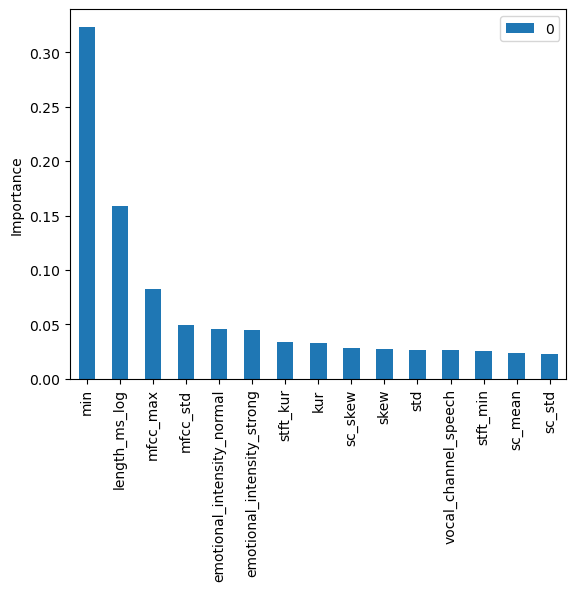

In [35]:
feature_names = df.columns
feature_names

feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(by=0, ascending=False)
feature_importance

print(clf.feature_importances_)

#plt.figure(figsize=(11, 5))
feature_importance.head(15).plot(kind='bar')
plt.ylabel("Importance")
plt.show()

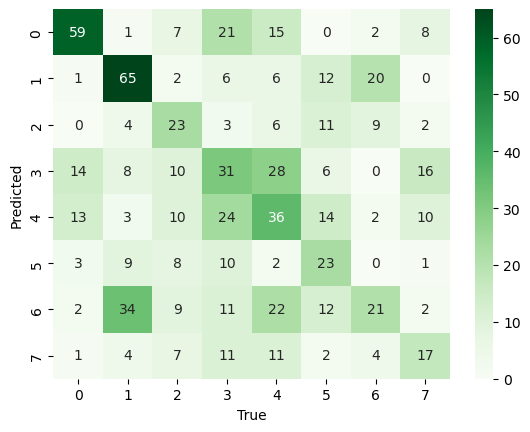

In [36]:
cf = confusion_matrix(y_test, y_pred) #per progetto similarità tra classi (es. emozioni)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

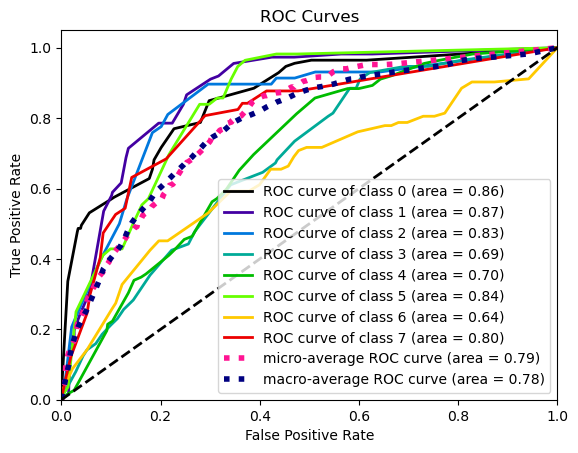

0.7792364238652953


In [37]:
plot_roc(y_test, clf.predict_proba(x_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(x_test), multi_class="ovr", average="macro"))

In [38]:
%%time
param_grid = {
    "min_samples_split":uniform(0.0005,0.005),
    "min_samples_leaf": uniform(0.00005, 0.005),
    "min_impurity_decrease":uniform(0.00005, 0.005),
    "max_depth": randint(5, 40),
    "criterion": ["gini", "entropy"],
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5,random_state=0),
    n_jobs=-1,
    n_iter=500,
)
grid.fit(x_train, y_train)
clf = grid.best_estimator_

Wall time: 1min 43s


In [39]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'gini', 'max_depth': 24, 'min_impurity_decrease': 0.0024611077603593785, 'min_samples_leaf': 0.00031094102687524657, 'min_samples_split': 0.004242066044881431} 0.3998182531157827


In [40]:
clf.score(x_test, y_test) #score sul test

0.3746594005449591

In [41]:
"""
param_grid = {
    "min_samples_split": [0.002, 0.01, 0.05, 0.1, 0.2],
    "min_samples_leaf": [0.001, 0.01, 0.05, 0.1, 0.2],
    "max_depth": range(2, 42, 2),
    "criterion": ["gini", "entropy"],
} 

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    refit=True,
) #refit = alla fine ti seleziona il migliore (forse, ricontrolla)
"""

'\nparam_grid = {\n    "min_samples_split": [0.002, 0.01, 0.05, 0.1, 0.2],\n    "min_samples_leaf": [0.001, 0.01, 0.05, 0.1, 0.2],\n    "max_depth": range(2, 42, 2),\n    "criterion": ["gini", "entropy"],\n} \n\ngrid = GridSearchCV(\n    DecisionTreeClassifier(),\n    param_grid=param_grid,\n    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),\n    n_jobs=-1,\n    refit=True,\n) #refit = alla fine ti seleziona il migliore (forse, ricontrolla)\n'

In [42]:
#%%time
#grid.fit(x_train, y_train)


In [43]:
#clf = grid.best_estimator_ #salviamo migliore parametri

In [44]:
#print(grid.best_params_, grid.best_score_) #vediamo i migliori parametri 

In [45]:
#clf.score(x_test, y_test) #score sul test

In [46]:
grid.cv_results_ #risutlati per ogni combinazione di parametri (forse)
results = pd.DataFrame(grid.cv_results_) #in dataframe per miglior visualizzazione 
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,params,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070900,0.007945,0.000000,0.000000,entropy,21,0.003695,0.003376,0.002911,"{'criterion': 'entropy', 'max_depth': 21, 'min...",...,0.327485,0.418129,0.361516,0.387755,0.412281,0.394737,0.339181,0.383469,0.026007,248
1,0.025002,0.007655,0.000625,0.003062,gini,26,0.00037,0.001884,0.001743,"{'criterion': 'gini', 'max_depth': 26, 'min_im...",...,0.333333,0.359649,0.376093,0.411079,0.394737,0.406433,0.353801,0.381415,0.021055,332
2,0.018439,0.006003,0.000625,0.003062,gini,28,0.003487,0.001214,0.003925,"{'criterion': 'gini', 'max_depth': 28, 'min_im...",...,0.345029,0.371345,0.370262,0.390671,0.380117,0.383041,0.383041,0.373465,0.028504,396
3,0.051254,0.007016,0.000000,0.000000,entropy,5,0.000295,0.004374,0.001839,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",...,0.342105,0.397661,0.376093,0.396501,0.342105,0.377193,0.339181,0.355426,0.025454,459
4,0.017189,0.004688,0.000313,0.002188,gini,38,0.003942,0.003039,0.005216,"{'criterion': 'gini', 'max_depth': 38, 'min_im...",...,0.345029,0.388889,0.379009,0.381924,0.359649,0.365497,0.365497,0.363711,0.026372,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.016564,0.003711,0.000625,0.003062,gini,8,0.003941,0.001631,0.001034,"{'criterion': 'gini', 'max_depth': 8, 'min_imp...",...,0.345029,0.388889,0.379009,0.381924,0.359649,0.365497,0.365497,0.363420,0.026482,427
496,0.024689,0.009927,0.000000,0.000000,gini,30,0.002037,0.002269,0.005036,"{'criterion': 'gini', 'max_depth': 30, 'min_im...",...,0.365497,0.412281,0.413994,0.422741,0.388889,0.429825,0.356725,0.392805,0.021312,33
497,0.081237,0.006004,0.000000,0.000000,entropy,31,0.002075,0.000966,0.005454,"{'criterion': 'entropy', 'max_depth': 31, 'min...",...,0.339181,0.406433,0.381924,0.396501,0.412281,0.406433,0.336257,0.384691,0.024829,202
498,0.015739,0.000337,0.000000,0.000000,gini,12,0.004873,0.004419,0.002458,"{'criterion': 'gini', 'max_depth': 12, 'min_im...",...,0.309942,0.380117,0.346939,0.332362,0.356725,0.353801,0.356725,0.348238,0.020485,492


In [47]:
"""
results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]
results["metric_weight"]
"""

'\nresults["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]\nresults["metric_weight"]\n'

In [48]:
"""
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
) #come si comportano le combinazioni di parametri, qui semplice perché poche combinazioni (nel progetto avremo più plot)
"""

'\nsns.lineplot(\n    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"\n) #come si comportano le combinazioni di parametri, qui semplice perché poche combinazioni (nel progetto avremo più plot)\n'

In [49]:
y_pred = clf.predict(x_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57       113
           1       0.51      0.58      0.54       112
           2       0.30      0.40      0.34        58
           3       0.26      0.27      0.27       113
           4       0.29      0.32      0.30       112
           5       0.29      0.41      0.34        56
           6       0.36      0.19      0.25       113
           7       0.30      0.30      0.30        57

    accuracy                           0.37       734
   macro avg       0.37      0.37      0.36       734
weighted avg       0.38      0.37      0.37       734



In [51]:
clf.predict_proba(x_test_norm) #probabilità di essere 0, 1, 2...

array([[0.15      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.925     , 0.025     , ..., 0.        , 0.025     ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1       , 0.8       ,
        0.        ],
       ...,
       [0.15      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.44444444, 0.        , ..., 0.11111111, 0.14814815,
        0.03703704],
       [0.        , 0.44444444, 0.        , ..., 0.11111111, 0.14814815,
        0.03703704]])

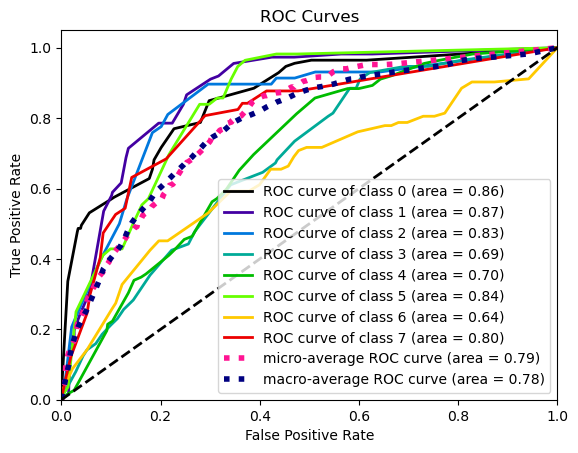

0.7792364238652953


In [52]:
plot_roc(y_test, clf.predict_proba(x_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(x_test), multi_class="ovr", average="macro"))

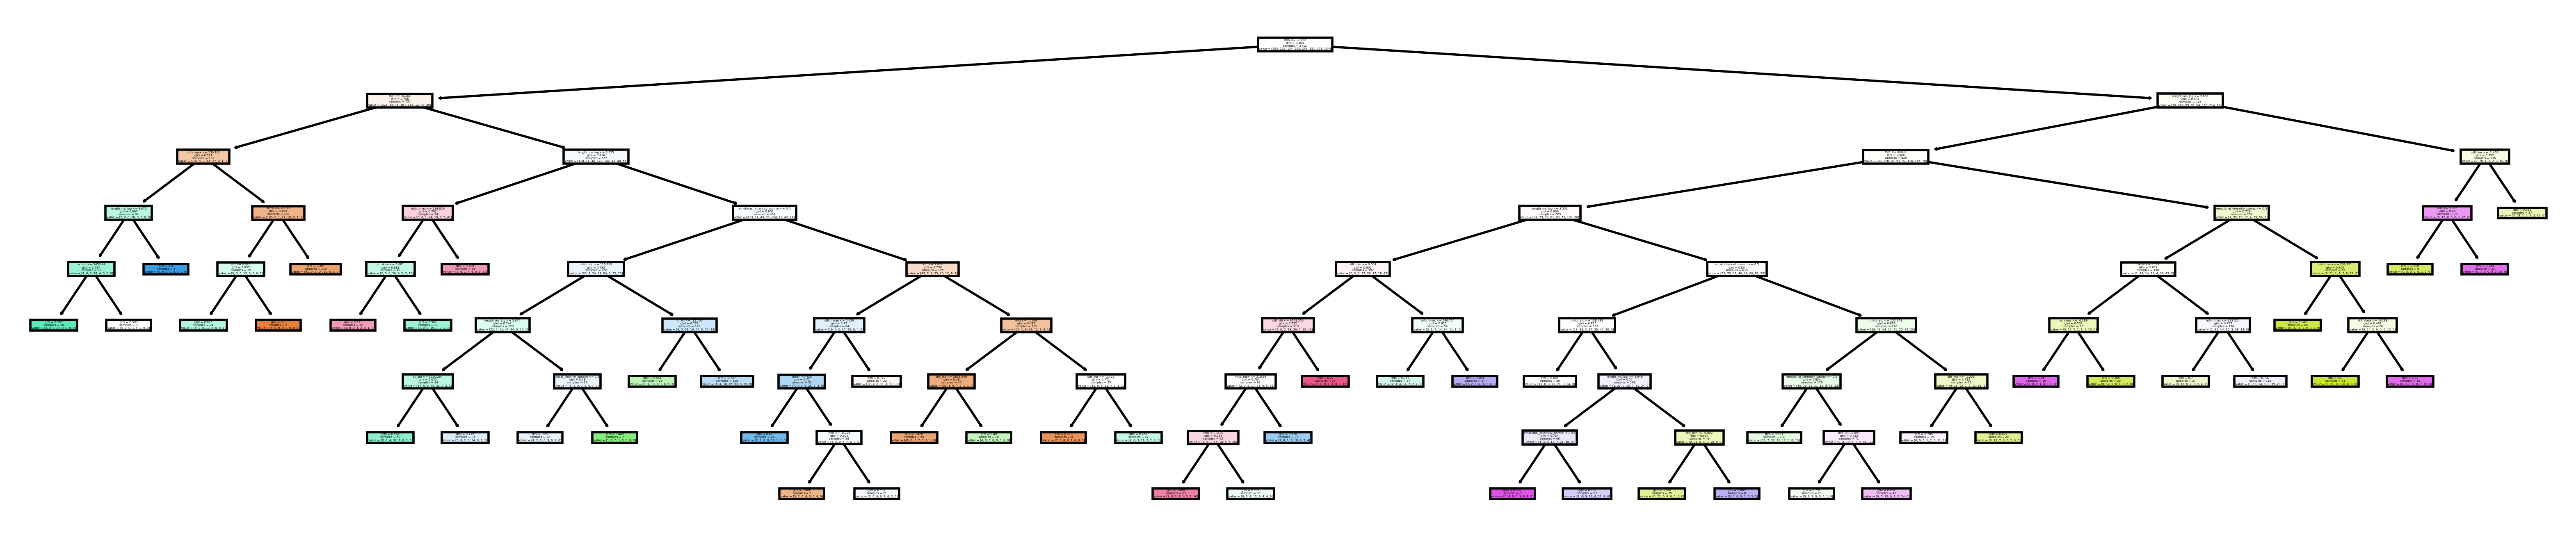

In [53]:
plt.figure(figsize=(20, 4), dpi=400)
plot_tree(clf, feature_names=df.columns, filled=True)
plt.show()

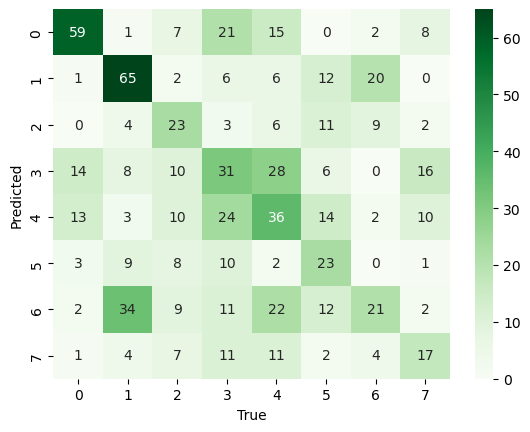

In [54]:
cf = confusion_matrix(y_test, y_pred) #per progetto similarità tra classi (es. emozioni)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

[0.         0.         0.04922457 0.08215595 0.         0.02297568
 0.         0.         0.         0.02825487 0.01062315 0.02334338
 0.02564508 0.03359674 0.01795486 0.00959236 0.00962266 0.32351262
 0.03296546 0.02780589 0.01720081 0.         0.15910069 0.
 0.03559825 0.04617106 0.0446559  0.         0.         0.
 0.         0.         0.        ]


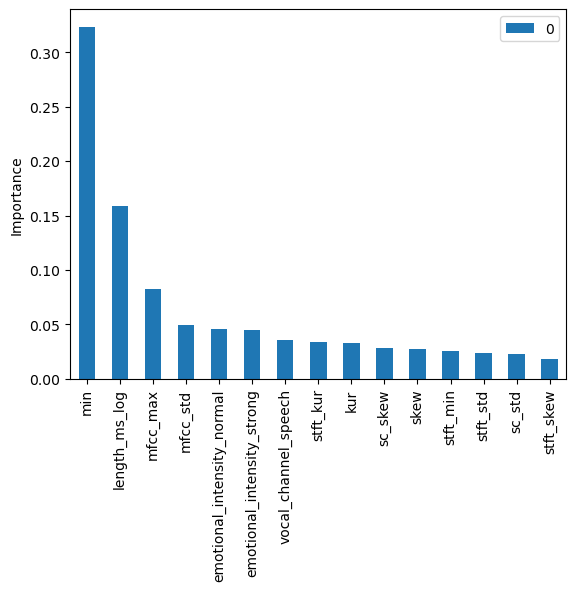

In [55]:
feature_names = df.columns
feature_names

feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(by=0, ascending=False)
feature_importance

print(clf.feature_importances_)

#plt.figure(figsize=(11, 5))
feature_importance.head(15).plot(kind='bar')
plt.ylabel("Importance")
plt.show()

## Vocal_channel

In [11]:
df = pd.read_csv('clean_ravdess_dm1.csv', skipinitialspace=True)
df.drop(['Unnamed: 0'], inplace=True, axis=1)
y = np.array(df["vocal_channel"])
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,mfcc_mean,mfcc_std,mfcc_max,...,stft_kur,stft_skew,mean,std,min,kur,skew,intFill,zcs_log,length_ms_log
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,-33.485947,134.654860,171.69092,...,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,9.406061,0.273153,-36.793432,4.230321,3.572523
1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,-29.502108,130.485630,205.00770,...,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,19.564187,0.292157,-33.816810,4.143202,3.591510
2,speech,happy,strong,Dogs are sitting by the door,2nd,16.0,F,-30.532463,126.577110,165.45653,...,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,4.881241,0.302659,-32.290737,4.272375,3.669410
3,song,surprised,normal,Kids are talking by the door,1st,14.0,F,-36.059555,159.725160,190.03609,...,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,13.040259,-0.081014,-49.019839,4.065094,3.560743
4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,-31.405996,122.125824,161.13400,...,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,7.485109,0.414872,-31.214503,4.180040,3.643847


In [12]:
categorical_cols = ["emotion","emotional_intensity","statement","repetition","sex"]

df = pd.get_dummies(df, columns=categorical_cols)#we get one colum for song and one column for speech
X = df.values

le = LabelEncoder()
df['vocal_channel'] = le.fit_transform(df['vocal_channel'])# se faccio metodo dummy avrei altre 8 colonne in più. cosi rimane una

In [13]:
y = np.array(df["vocal_channel"]) #target variable
df.drop('vocal_channel', axis=1, inplace=True)
x=df.values


In [14]:
x.shape, y.shape

((2446, 39), (2446,))

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=0
)

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1712, 39), (1712,), (734, 39), (734,))

In [17]:
# with stratify you make every portion to be quite similar
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.40719542 0.59280458]
[0.40712617 0.59287383]
[0.40735695 0.59264305]


### Knn

In [18]:
norm = StandardScaler() #standardizzare test e train separatamente, altrimenti cheat
norm.fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

In [64]:
%%time
param_grid = {
    "n_neighbors": np.arange(1, 150),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
} 

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
)
grid.fit(x_train_norm, y_train)
clf = grid.best_estimator_

Wall time: 1min 19s


In [65]:
print(grid.best_params_, grid.best_score_)

{'metric': 'cityblock', 'n_neighbors': 25, 'weights': 'distance'} 0.8867981177433378


In [66]:
clf.score(x_test_norm, y_test)

0.8950953678474114

In [67]:
grid.cv_results_ #risutlati per ogni combinazione di parametri (forse)
results = pd.DataFrame(grid.cv_results_) #in dataframe per miglior visualizzazione 
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000645,0.002216,0.025210,0.011018,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.810496,0.833819,...,0.821637,0.786550,0.836735,0.836735,0.789474,0.821637,0.827485,0.823246,0.016818,592
1,0.000959,0.003707,0.022079,0.009501,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.810496,0.833819,...,0.821637,0.786550,0.836735,0.836735,0.789474,0.821637,0.827485,0.823246,0.016818,592
2,0.001563,0.004688,0.029431,0.008654,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.801749,0.833819,...,0.807018,0.763158,0.795918,0.836735,0.760234,0.812865,0.815789,0.803272,0.018957,596
3,0.002214,0.005489,0.018516,0.008158,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.810496,0.833819,...,0.821637,0.786550,0.836735,0.836735,0.789474,0.821637,0.827485,0.823246,0.016818,592
4,0.002833,0.005994,0.028279,0.007623,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.836735,0.839650,...,0.847953,0.827485,0.845481,0.886297,0.821637,0.842105,0.845029,0.850761,0.017357,583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0.000956,0.003721,0.029920,0.006586,cityblock,147,distance,"{'metric': 'cityblock', 'n_neighbors': 147, 'w...",0.877551,0.877551,...,0.880117,0.880117,0.895044,0.886297,0.862573,0.894737,0.859649,0.882709,0.016931,100
592,0.001377,0.004305,0.036830,0.007561,cityblock,148,uniform,"{'metric': 'cityblock', 'n_neighbors': 148, 'w...",0.868805,0.874636,...,0.877193,0.874269,0.886297,0.883382,0.865497,0.883041,0.856725,0.878329,0.016827,199
593,0.001355,0.004310,0.029682,0.009135,cityblock,148,distance,"{'metric': 'cityblock', 'n_neighbors': 148, 'w...",0.874636,0.874636,...,0.880117,0.880117,0.892128,0.889213,0.859649,0.900585,0.862573,0.883410,0.017644,68
594,0.000938,0.003711,0.038800,0.010005,cityblock,149,uniform,"{'metric': 'cityblock', 'n_neighbors': 149, 'w...",0.868805,0.874636,...,0.877193,0.874269,0.889213,0.889213,0.868421,0.885965,0.859649,0.880140,0.016423,175


In [68]:
results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]
results["metric_weight"]

0       euclidean , uniform
1      euclidean , distance
2       euclidean , uniform
3      euclidean , distance
4       euclidean , uniform
               ...         
591    cityblock , distance
592     cityblock , uniform
593    cityblock , distance
594     cityblock , uniform
595    cityblock , distance
Name: metric_weight, Length: 596, dtype: object

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

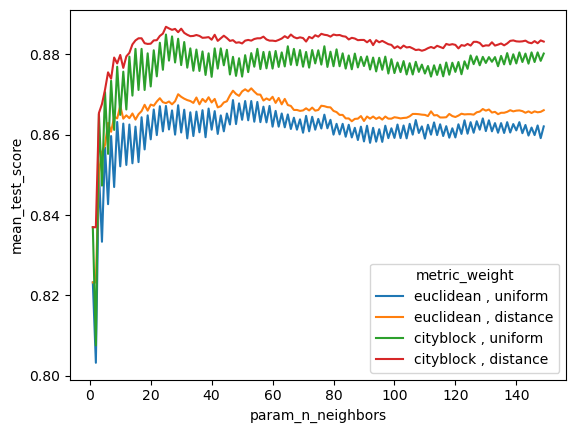

In [69]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
) #come si comportano le combinazioni di parametri, qui semplice perché poche combinazioni (nel progetto avremo più plot)

In [70]:
y_pred = clf.predict(x_test_norm)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       299
           1       0.95      0.87      0.91       435

    accuracy                           0.90       734
   macro avg       0.89      0.90      0.89       734
weighted avg       0.90      0.90      0.90       734



In [72]:
clf.predict_proba(x_test_norm) #probabilità di essere 0, 1

array([[0.08146649, 0.91853351],
       [0.        , 1.        ],
       [0.96512763, 0.03487237],
       ...,
       [0.0330567 , 0.9669433 ],
       [0.17486344, 0.82513656],
       [0.68751988, 0.31248012]])

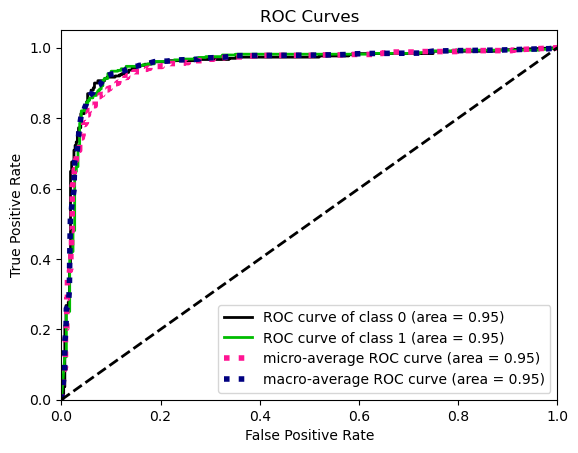

ValueError: y should be a 1d array, got an array of shape (734, 2) instead.

In [73]:
plot_roc(y_test, clf.predict_proba(x_test_norm))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(x_test_norm), multi_class="ovr", average="macro"))

### Naive Bayes

In [74]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       299
           1       0.96      0.76      0.85       435

    accuracy                           0.84       734
   macro avg       0.85      0.86      0.84       734
weighted avg       0.87      0.84      0.84       734



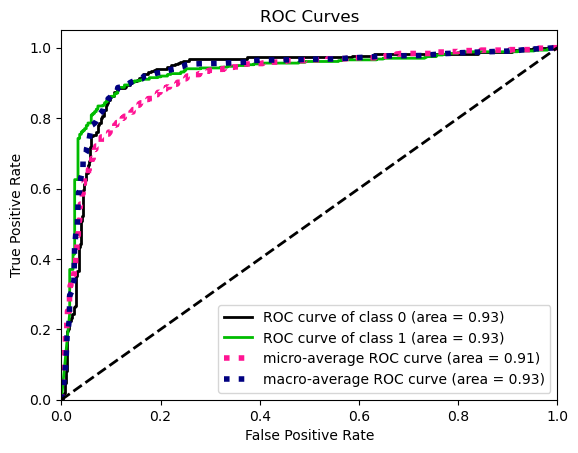

ValueError: y should be a 1d array, got an array of shape (734, 2) instead.

In [75]:
plot_roc(y_test, clf.predict_proba(x_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(x_test), multi_class="ovr", average="macro"))

### Decision Tree

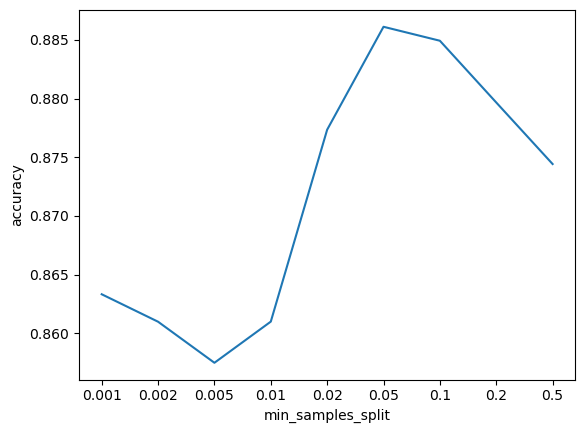

In [76]:
min_samples_splits = [0.001 , 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5] #primo hyperparameter
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, x_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()


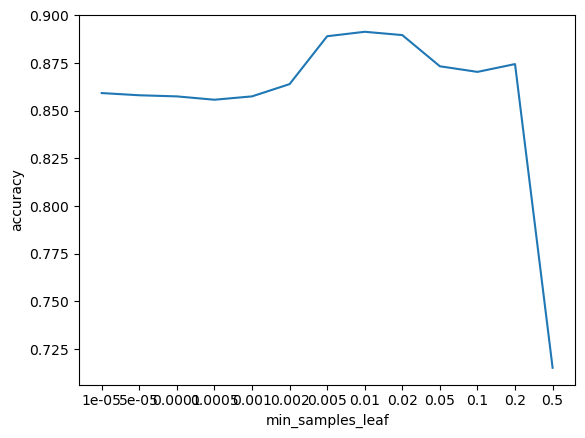

In [77]:
min_samples_leafs = [0.00001, 0.00005, 0.0001, 0.0005 ,0.001 , 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5] #altro
scores = list()
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores.append(cross_val_score(dt, x_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show() 

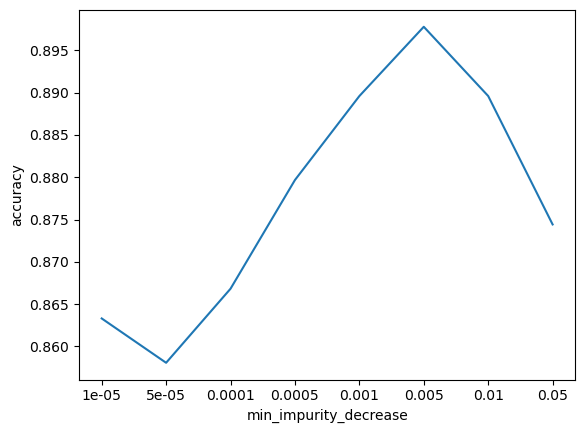

In [78]:
min_impurity_decreases= [0.00001, 0.00005,0.0001, 0.0005, 0.001, 0.005, 0.01,0.05]
scores = list()
for min_impurity_decrease in min_impurity_decreases:
    dt = DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
    scores.append(cross_val_score(dt, x_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_impurity_decreases)), min_impurity_decreases)
plt.xlabel("min_impurity_decrease")
plt.ylabel("accuracy")
plt.show()

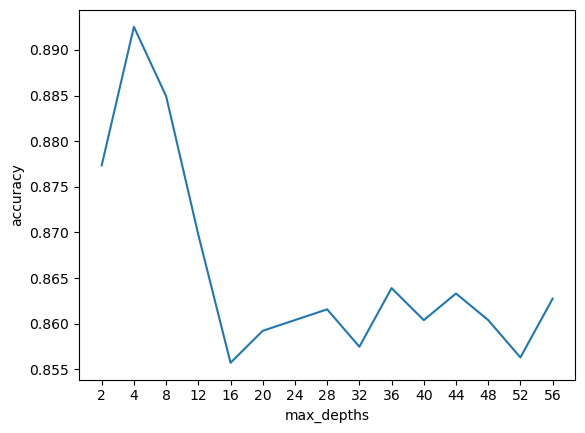

In [79]:
max_depths = [2, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, x_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

In [24]:
%%time
param_grid = {
    "max_depth": uniform(2, 8),
    "min_samples_split":uniform(0.01,0.5),
    "min_samples_leaf": uniform(0.001, 0.05),
    "min_impurity_decrease":uniform(0.0005, 0.01),
    "criterion": ["gini", "entropy"]
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=7,random_state=0),
    n_jobs=-1,
    n_iter=350,
)
grid.fit(x_train, y_train)
clf = grid.best_estimator_
print(grid.best_params_, grid.best_score_)

{'criterion': 'gini', 'max_depth': 6.193353908895425, 'min_impurity_decrease': 0.0009071720321614459, 'min_samples_leaf': 0.007288893258643053, 'min_samples_split': 0.024808932125796816} 0.8978963341776992
Wall time: 25.1 s


In [25]:
clf.score(x_test, y_test) #score sul test

0.9141689373297003

In [26]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       299
           1       0.92      0.94      0.93       435

    accuracy                           0.91       734
   macro avg       0.91      0.91      0.91       734
weighted avg       0.91      0.91      0.91       734



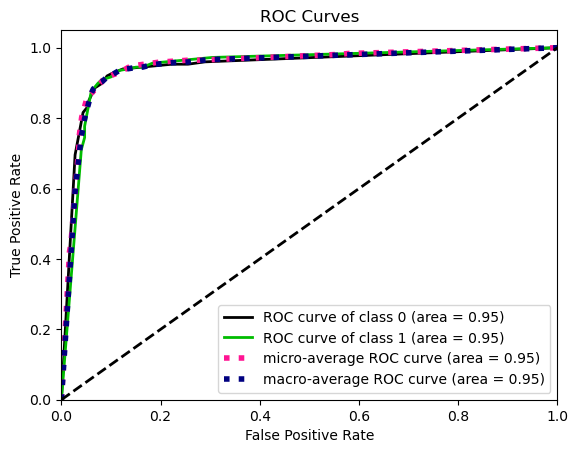

ValueError: y should be a 1d array, got an array of shape (734, 2) instead.

In [27]:
plot_roc(y_test, clf.predict_proba(x_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(x_test), multi_class="ovr", average="macro"))

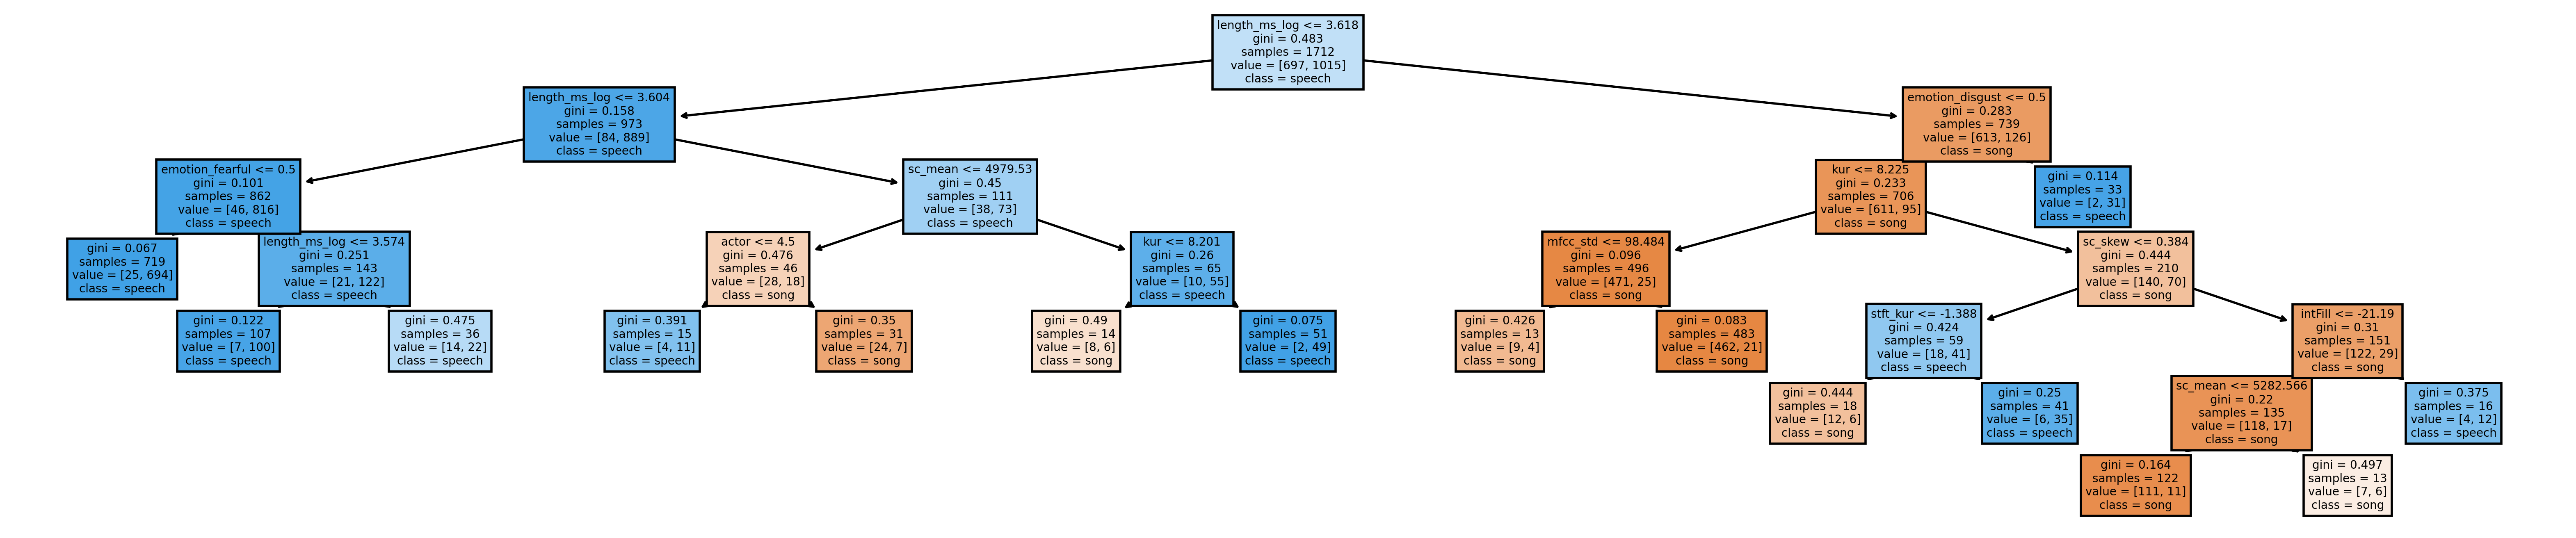

In [28]:
plt.figure(figsize=(20, 4), dpi=400)
plot_tree(clf, feature_names=df.columns, class_names=["song", "speech"], filled=True)
plt.show()

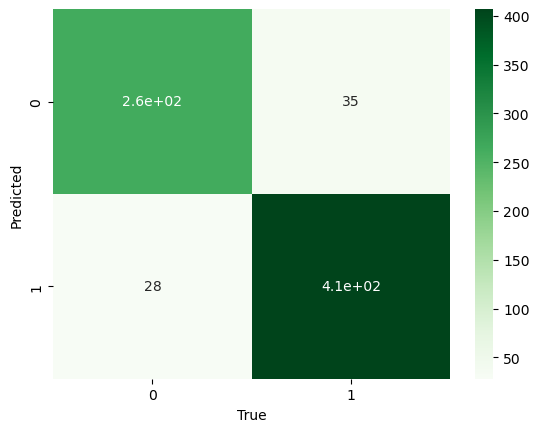

In [29]:
cf = confusion_matrix(y_test, y_pred) #per progetto similarità tra classi (es. emozioni)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

[0.         0.         0.         0.         0.01889389 0.
 0.         0.         0.         0.03637018 0.         0.
 0.         0.         0.         0.         0.         0.02118042
 0.04003983 0.         0.         0.         0.81428105 0.
 0.         0.06923464 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


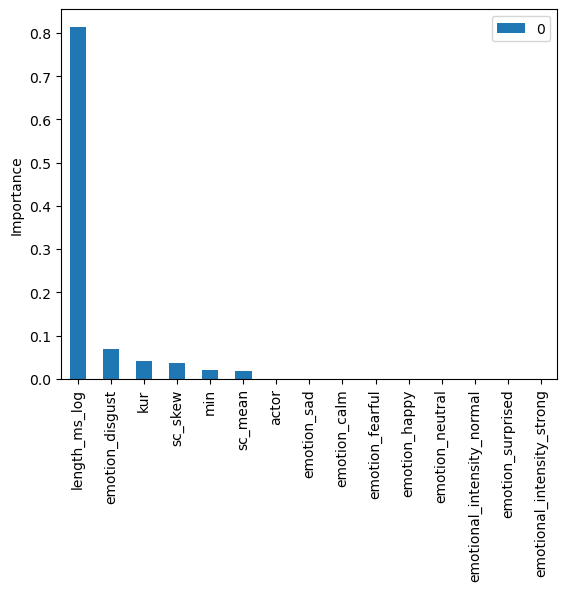

In [87]:
feature_names = df.columns
feature_names

feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(by=0, ascending=False)
feature_importance

print(clf.feature_importances_)

#plt.figure(figsize=(11, 5))
feature_importance.head(15).plot(kind='bar')
plt.ylabel("Importance")
plt.show()